<a href="https://colab.research.google.com/github/AlirezaPNouri/Storytelling/blob/main/Experiment_comparison_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this class, i will examine the performance of different methods and analyze their results

In [22]:
import pickle


In [23]:
dataset = 'NYT' # ['NYT', 'covid']
if dataset == 'covid':
  doc2vec_Embed_dict = pickle.load(open('doc_2vec_covid_Embed_dict.p', 'rb'))
  doc2vec_full_story = pickle.load(open('doc_2vec_covid_full_story.p', 'rb'))
  doc2ve_list_of_dfs= pickle.load(open('doc_2vec_covid_list_of_dfs.p', 'rb'))

  ji_Embed_dict = pickle.load(open('JI_covid_Embed_dict.p', 'rb'))
  ji_full_story = pickle.load(open('JI_covid_full_story.p', 'rb'))
  ji_list_of_df = pickle.load(open('JI_covid_list_of_dfs.p', 'rb'))

  bert_Embed_dict = pickle.load(open('Bert_covid_Embed_dict.p', 'rb'))
  bert_full_story = pickle.load(open('Bert_covid_full_story.p', 'rb'))

  proposed_embed = pickle.load(open('emb__covid.p', 'rb'))
  proposed_Embed_dict = pickle.load(open('drive/MyDrive/temp/Embed_dict_covid.p', 'rb'))
  proposed_final_weight = pickle.load(open('final_weight_covid.p', 'rb'))
  proposed_full_story = pickle.load(open('full_story_covid.p', 'rb'))
  topic_n = 5
  
elif dataset == 'NYT':
  doc2vec_Embed_dict = pickle.load(open('doc_2vec_NYT_Embed_dict.p', 'rb'))
  doc2vec_full_story = pickle.load(open('doc_2vec_NYT_full_story.p', 'rb'))
  doc2ve_list_of_dfs= pickle.load(open('doc_2vec_NYT_list_of_dfs.p', 'rb'))

  ji_Embed_dict = pickle.load(open('JI_NYT_Embed_dict.p', 'rb'))
  ji_full_story = pickle.load(open('JI_NYT_full_story.p', 'rb'))
  ji_list_of_df = pickle.load(open('JI_NYT_list_of_dfs.p', 'rb'))

  bert_Embed_dict = pickle.load(open('Bert_NYT_Embed_dict.p', 'rb'))
  bert_full_story = pickle.load(open('Bert_NYT_full_story.p', 'rb'))
  bert_list_of_df = pickle.load(open('Bert_NYT_list_of_dfs.p', 'rb'))

  proposed_embed = pickle.load(open('emb_.p', 'rb'))
  proposed_Embed_dict = pickle.load(open('drive/MyDrive/temp/Embed_dict.p', 'rb'))
  proposed_final_weight = pickle.load(open('final_weight.p', 'rb'))
  proposed_full_story = pickle.load(open('full_story.p', 'rb'))
  proposed_list_of_dfs = pickle.load(open('list_of_dfs.p', 'rb'))
  topic_n = 5
else:
  print('dataset does not exist!')



In [52]:
bert_embedding = bert_Embed_dict[0]
proposed_embedding = proposed_embed[0]
total_doc_BERT =sum([len(bert_embedding[x].keys()) for x in bert_embedding.keys()])
total_doc_doc2vec = sum([len(doc2vec_Embed_dict[x].keys()) for x in doc2vec_Embed_dict.keys()])
total_doc_ji = sum([len(ji_Embed_dict[x].keys()) for x in ji_Embed_dict.keys()])           
total_doc_proposed = sum([len(proposed_embedding[x].keys()) for x in proposed_embedding.keys()])

In [76]:
import numpy as np
def normalize_vec(vec):
  """
  # this function will receive a vector and the min and max of that vector and will return the normalized vec 
  """
  n_ = np.array(vec)
  z_ = n_ / np.sqrt(np.sum(n_*n_)+0.0000001)
  return z_.tolist()


In [80]:
bert_total_dict = dict()
for t_ in bert_embedding.keys():
  for d_ in bert_embedding[t_].keys():
    bert_total_dict[d_] = bert_embedding[t_][d_]
bert_story_embed = list()
for st_ in bert_full_story:
  temp_list = list()
  for ind, ind_1 in zip(st_[:-1], st_[1:]):
    try:
      temp_list.append(bert_total_dict[ind][ind_1])
    except:
      pass
  bert_story_embed.append(normalize_vec(temp_list))




In [81]:
doc2vec_total_dict = dict()
for t_ in doc2vec_Embed_dict.keys():
  for d_ in doc2vec_Embed_dict[t_].keys():
    doc2vec_total_dict[d_] = doc2vec_Embed_dict[t_][d_]
doc2vec_story_embed = list()
for st_ in doc2vec_full_story:
  temp_list = list()
  for ind, ind_1 in zip(st_[:-1], st_[1:]):
    try:
      temp_list.append(doc2vec_total_dict[ind][ind_1])
    except:
      pass
  doc2vec_story_embed.append(normalize_vec(temp_list))

In [82]:
ji_total_dict = dict()
for t_ in ji_Embed_dict.keys():
  for d_ in ji_Embed_dict[t_].keys():
    ji_total_dict[d_] = ji_Embed_dict[t_][d_]
ji_story_embed = list()
for st_ in ji_full_story:
  temp_list = list()
  for ind, ind_1 in zip(st_[:-1], st_[1:]):
    try:
      temp_list.append(ji_total_dict[ind][ind_1])
    except:
      pass
  ji_story_embed.append(normalize_vec(temp_list))

In [83]:
proposed_embedding = proposed_embed[0]

proposed_total_dict = dict()
for t_ in proposed_embedding.keys():
  for d_ in proposed_embedding[t_].keys():
    proposed_total_dict[d_] = proposed_embedding[t_][d_]
proposed_story_embed = list()
for st_ in proposed_full_story:
  temp_list = list()
  for ind, ind_1 in zip(st_[:-1], st_[1:]):
    try:
      temp_list.append(proposed_total_dict[ind][ind_1])
    except:
      pass
  proposed_story_embed.append(normalize_vec(temp_list))

In [85]:
# before normalization
print(bert_story_embed)
print(doc2vec_story_embed)
print(ji_story_embed)
print(proposed_story_embed)




[[0.02054522575813249, 0.01548793941766911, 0.015171859021390148, 0.01548793941766911, 0.016436180606505993, 0.01833266298417976, 0.0180165825879008, 0.016436180606505993, 0.01833266298417976, 0.018964823776737687, 0.014855778625111187, 0.01580401981394807, 0.016120100210227032, 0.01833266298417976, 0.021177386550690416, 0.018648743380458722, 0.0180165825879008, 0.0180165825879008, 0.016752261002784954, 0.01738442179534288, 0.01833266298417976, 0.018964823776737687, 0.017068341399063918, 0.018648743380458722, 0.017068341399063918, 0.01770050219162184, 0.019280904173016648, 0.018964823776737687, 0.018964823776737687, 0.017068341399063918, 0.0180165825879008, 0.0180165825879008, 0.02054522575813249, 0.021809547343248338, 0.017068341399063918, 0.01770050219162184, 0.018964823776737687, 0.01991306496557457, 0.021493466946969377, 0.01959698456929561, 0.018648743380458722, 0.018648743380458722, 0.02022914536185353, 0.0180165825879008, 0.018964823776737687, 0.01991306496557457, 0.018964823776

In [25]:
def LEM(set_stories, ND, NS, NTS, NT):
  res = 0
  story_len = [len(x) for x in set_stories]
  res = (ND*NS) / (NTS * NT * sum(story_len))
  return res


In [54]:
LEM_BERT = LEM(bert_full_story, total_doc_BERT, len(bert_full_story), len(bert_embedding.keys()), topic_n)
LEM_doc2vec = LEM(doc2vec_full_story, total_doc_doc2vec, len(doc2vec_full_story), len(doc2vec_Embed_dict.keys()), topic_n)
LEM_JI = LEM(ji_full_story, total_doc_ji, len(ji_full_story), len(ji_Embed_dict.keys()), topic_n)
LEM_proposed = LEM(proposed_full_story, total_doc_proposed, len(proposed_full_story), len(proposed_embedding.keys()), topic_n)     # for covid proposed method has the highest value and doc2vec has the second rank
print('For dataset ', dataset, ', LEM value for different methods are: ')
print('\t for BERT: ', LEM_BERT)
print('\t for DOC2VEC: ', LEM_doc2vec)
print('\t for Jaccard Index: ', LEM_JI)
print('\t for proposed method: ', LEM_proposed)

For dataset  NYT , LEM value for different methods are: 
	 for BERT:  0.020091421913915986
	 for DOC2VEC:  0.6727759785694295
	 for Jaccard Index:  0.8088452997779423
	 for proposed method:  0.4807308334017122


In [107]:
def NS_fun(story_embed_):
  res = list()
  for x in story_embed_:
    res.append(sum(x)/len(x))
  mean = np.mean(res)
  sd = np.std(res)
  return (np.pi*sd) * np.exp(-0.5*((res-mean)/sd)**2)
  

In [114]:
# print(NS_fun(bert_story_embed))
# print(NS_fun(doc2vec_story_embed))
# print(NS_fun(ji_story_embed))
# print(NS_fun(proposed_story_embed))

bert_NS = NS_fun(bert_story_embed)
doc2vec_NS = NS_fun(doc2vec_story_embed)
ji_NS = NS_fun(ji_story_embed)
proposed_NS = NS_fun(proposed_story_embed)
print(' for dataset ', dataset)
print('NS value for bert model is :', sum(bert_NS) / len(bert_NS))
print('NS value for doc2vec model is :',sum(doc2vec_NS) / len(doc2vec_NS))
print('NS value for Jaccard Index model is :',sum(ji_NS) / len(ji_NS))
print('NS value for proposed method is :',sum(proposed_NS) / len(proposed_NS))

 for dataset  NYT
NS value for bert model is : 0.046492706670283504
NS value for doc2vec model is : 0.03227608011860488
NS value for Jaccard Index model is : 0.017074624770766104
NS value for proposed method is : 0.006205025964276441


Text(0, 0.5, 'Probability Density')

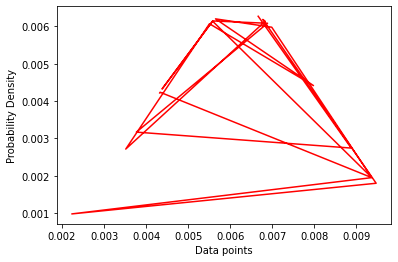

In [112]:
# Importing required libraries
 
import numpy as np
import matplotlib.pyplot as plt
 
# Creating a series of data of in range of 1-50.
x = proposed_NS
 
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
 
#Calculate mean and Standard deviation.
mean = np.mean(x)
sd = np.std(x)
 
#Apply function to the data.
pdf = normal_dist(x,mean,sd)
 
#Plotting the Results
plt.plot(x,pdf , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')